# Dask DataFrame

Материалы: 
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [ ]:
import dask.dataframe as dd

In [ ]:
accounts = dd.read_csv("./data/accounts/accounts.*.csv", dtype={"amount": "float64", "id": "int64", "names": "object"})

In [ ]:
accounts.isna().sum().compute()

id        0
names     0
amount    3
dtype: int64

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [ ]:
%%time
accounts.groupby('names')['amount'].sum().compute()
accounts.groupby('names')['amount'].mean().compute()

CPU times: user 1.02 s, sys: 168 ms, total: 1.19 s
Wall time: 563 ms


names
Alice        651.642077
Bob          857.655499
Charlie     1745.577526
Dan          920.095002
Edith       1048.074585
Frank       1329.394553
George       935.259292
Hannah      1234.223967
Ingrid      1229.990035
Jerry        513.231526
Kevin       1089.550393
Laura       1985.839851
Michael     2642.594553
Norbert      754.775107
Oliver       400.505664
Patricia     935.283520
Quinn       1232.199880
Ray          505.220709
Sarah        798.997337
Tim         1019.603656
Ursula       339.521881
Victor       756.277665
Wendy        784.367351
Xavier      1787.366944
Yvonne       405.667128
Zelda        700.779296
Name: amount, dtype: float64

In [ ]:
import dask

In [ ]:
%%time
dask.compute(accounts.groupby("names")["amount"].mean(), accounts.groupby("names")["amount"].sum())

CPU times: user 558 ms, sys: 91.1 ms, total: 649 ms
Wall time: 304 ms


(names
 Alice        651.642077
 Bob          857.655499
 Charlie     1745.577526
 Dan          920.095002
 Edith       1048.074585
 Frank       1329.394553
 George       935.259292
 Hannah      1234.223967
 Ingrid      1229.990035
 Jerry        513.231526
 Kevin       1089.550393
 Laura       1985.839851
 Michael     2642.594553
 Norbert      754.775107
 Oliver       400.505664
 Patricia     935.283520
 Quinn       1232.199880
 Ray          505.220709
 Sarah        798.997337
 Tim         1019.603656
 Ursula       339.521881
 Victor       756.277665
 Wendy        784.367351
 Xavier      1787.366944
 Yvonne       405.667128
 Zelda        700.779296
 Name: amount, dtype: float64,
 names
 Alice       121135049.0
 Bob         134707661.0
 Charlie     190678161.0
 Dan          67436523.0
 Edith        94317280.0
 Frank       132918185.0
 George      171385330.0
 Hannah      134076218.0
 Ingrid      162441094.0
 Jerry        49464228.0
 Kevin        92375351.0
 Laura       193055407.0
 Mich

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [ ]:
def f(x):
    if x > 100:
        return x //100
    return 0

accounts["new_column"] = accounts["amount"].map(f)
accounts.head()

,id,names,amount,new_column
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0


## Лабораторная работа 13

__При решении данных задач не подразумевается использования других коллекций, кроме `dask.DataFrame`, если в задании явно не указано обратное.__

In [2]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask
import re
from datetime import datetime

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [3]:
recipes = dd.read_csv('../data/recipes_full/recipes_full_*.csv', parse_dates = ['submitted'], dtype={'minutes': 'float64','n_steps': 'float64'})
recipes.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [4]:
recipes.npartitions

24

In [5]:
recipes.dtypes

id                         int64
name                      object
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients              int64
dtype: object

3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [6]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [7]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
32595,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
32596,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
32597,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
32598,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
32599,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков (partitions).

In [8]:
recipes.map_partitions(lambda part: part.shape[0]).compute()

0     124600
1     124383
2      29972
3     123397
4     123198
5      32360
6     124887
7     124776
8      29292
9     123040
10    122975
11     32940
12    124968
13    124539
14     29448
15    122768
16    123047
17     33139
18    125122
19    124833
20     28999
21    123170
22    123184
23     32600
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` при решении данной задачи.

In [9]:
recipes['n_steps'].max().compute()

145.0

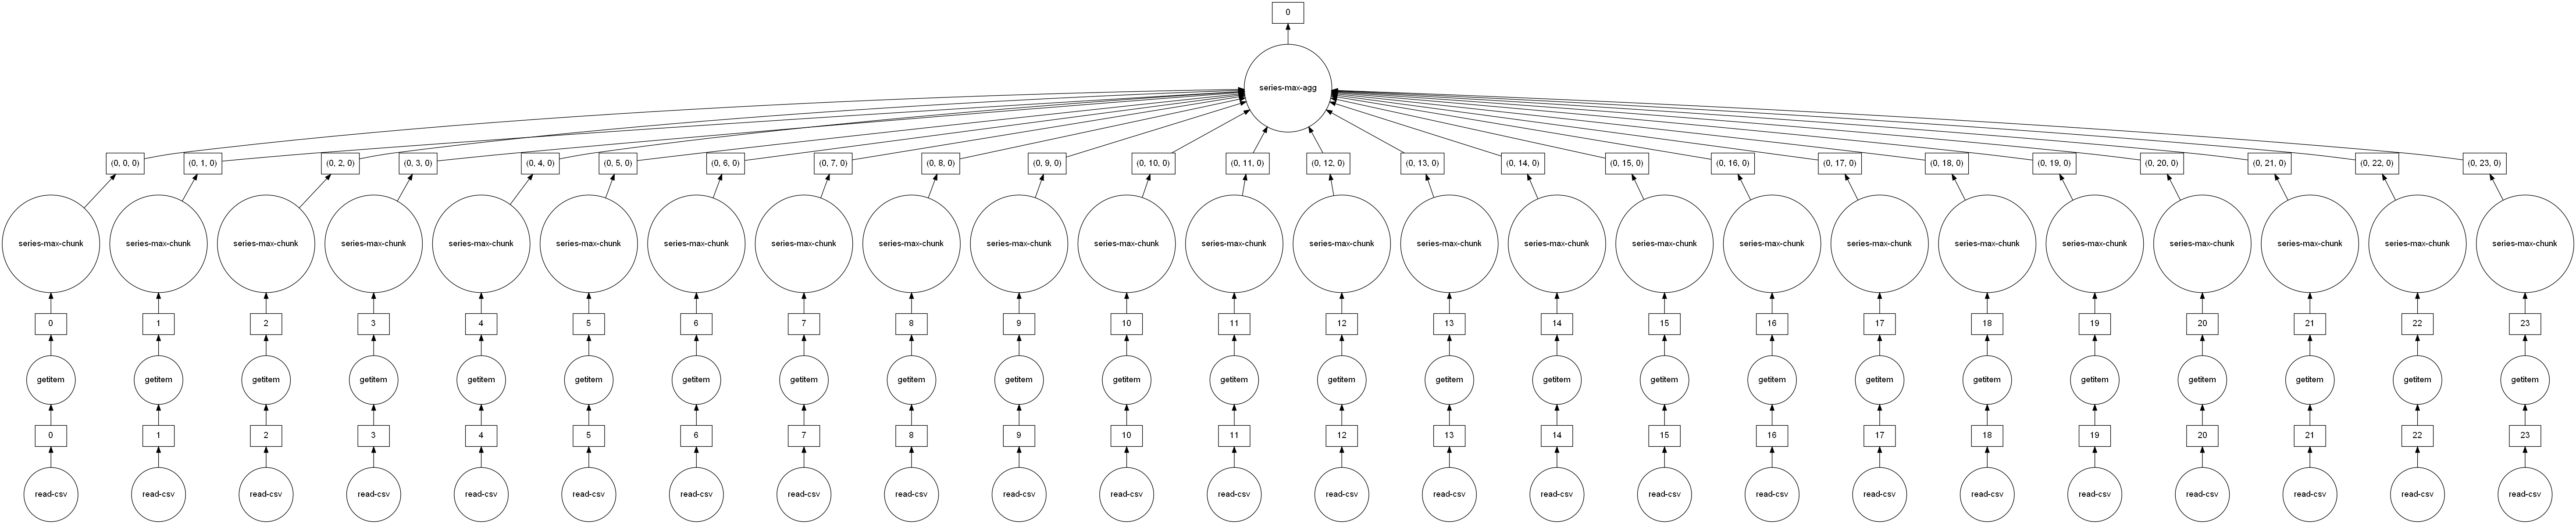

In [10]:
recipes['n_steps'].max().visualize()

6. Посчитайте количество рецептов с группировкой по месяцам добавления отзыва в базу.

In [15]:
count_recipes = recipes.groupby(recipes['submitted'].dt.month)['id'].count().compute()
count_recipes

submitted
1     193363
2     173834
3     192389
4     186049
5     192487
6     184205
7     189337
8     187276
9     181081
10    187018
11    180974
12    183624
Name: id, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [12]:
def add_rating(data):
    string, path = data
    json_obj = json.loads(string)
    json_obj['rating'] = int(re.findall('reviews_([0-9]).json', path)[0])
    json_obj['date'] = datetime.strptime(json_obj['date'], '%Y-%m-%d')
    return json_obj

reviews = db.read_text(urlpath='../data/reviews_full/reviews_*.json', include_path=True).map(add_rating)
reviews.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': datetime.datetime(2016, 5, 8, 0, 0),
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': datetime.datetime(2006, 6, 14, 0, 0),
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': datetime.datetime(1985, 11, 19, 0, 0),
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a pe

In [13]:
reviews = reviews.to_dataframe()
mean_rating = reviews.groupby(reviews['date'].dt.month)['rating'].mean().compute()
mean_rating

date
1     2.889066
2     2.884139
3     2.882260
4     2.895143
5     2.901843
6     2.896808
7     2.883242
8     2.886984
9     2.892020
10    2.891495
11    2.880343
12    2.875512
Name: rating, dtype: float64

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [14]:
new_df = pd.DataFrame([])
new_df['mean_rating'] = mean_rating
new_df['recipes_count'] = count_recipes
new_df

,mean_rating,recipes_count
date,,
1,2.889066,193363
2,2.884139,173834
3,2.882260,192389
4,2.895143,186049
5,2.901843,192487
6,2.896808,184205
7,2.883242,189337
8,2.886984,187276
9,2.892020,181081
